<a href="https://colab.research.google.com/github/divyasingh2611/Sentiment_analysis_imdb/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Dependencies

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

from bs4 import BeautifulSoup
import numpy as np
import csv
import warnings
import string
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_science_intern/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.duplicated().sum()

418

Drop duplicated value

In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


There is no null value present in the dataset

In [ ]:
data[data['review'].duplicated()]

,review,sentiment


# Data Cleaning

In [ ]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [ ]:
import nltk

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    # text = re.sub(r'\d+', '', text)

    # Remove non-English alphabets
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(i) for i in tokens if i not in stopwords.words('english')]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [ ]:
#Apply the functions

data['sentence'] = data['review'].apply(clean_text)

In [ ]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
data['sentence'][0]

'one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bit

In [ ]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
data['sentence'][1]

'wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done'

In [ ]:
data.head()

,review,sentiment,sentence
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# Visualization

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [ ]:
plt.rcParams['figure.figsize']= (12,6)
sns.set_style(style='darkgrid')

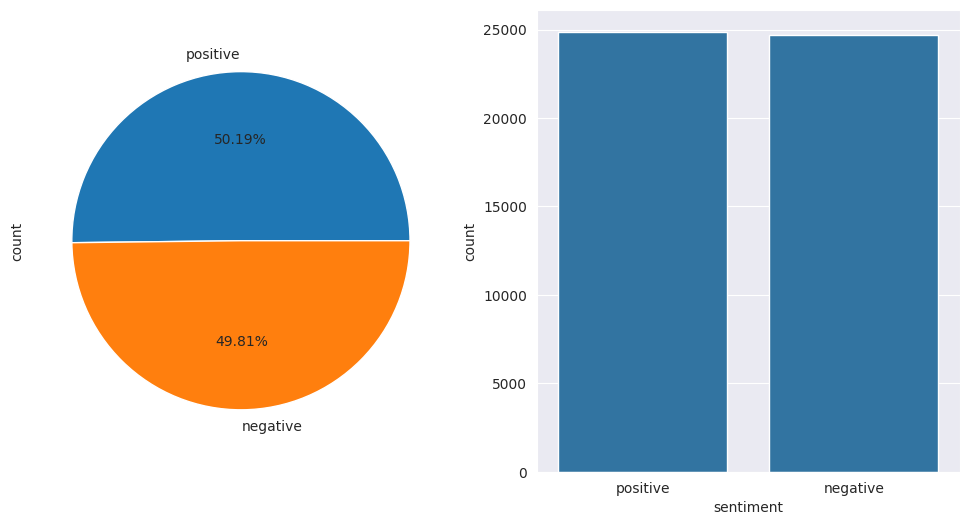

In [ ]:
[plt.subplot(1,2,1),data['sentiment'].value_counts().plot(kind='pie', autopct='%0.2f%%') ]
[plt.subplot(1,2,2),sns.countplot(data=data, x='sentiment')]
plt.show()

In [ ]:
# length

data['length']= data['sentence'].apply(len)
data.head()

,review,sentiment,sentence,length
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...,1125
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,640
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,580
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,446
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,851


In [ ]:
# number of words
data['num_words'] = data['sentence'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,review,sentiment,sentence,length,num_words
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...,1125,167
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,640,84
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,580,85
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,446,66
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,851,125


In [ ]:
data[['length','num_words']].describe()

,length,num_words
count,49582.000000,49582.000000
mean,820.290287,118.679259
std,632.802737,89.335453
min,17.000000,3.000000
25%,429.000000,64.000000
50%,603.000000,88.000000
75%,1000.000000,144.000000
max,9182.000000,1420.000000


Label datasets with negative=0 & positive=1

In [ ]:
positive= data[data['sentiment']=='positive']
negative= data[data['sentiment']=='negative']
data['label']= data['sentiment'].map({'negative':0,'positive':1})
data.head()

,review,sentiment,sentence,length,num_words,label
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...,1125,167,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,640,84,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,580,85,1
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,446,66,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,851,125,1


In [ ]:
# positive reviews
data[data['label'] == 1][['length','num_words']].describe()

,length,num_words
count,24884.000000,24884.000000
mean,835.628757,120.062490
std,664.699390,93.058185
min,36.000000,6.000000
25%,425.000000,63.000000
50%,603.500000,88.000000
75%,1022.000000,146.000000
max,9182.000000,1420.000000


In [ ]:
# negative reviews
data[data['label'] == 0][['length','num_words']].describe()

,length,num_words
count,24698.000000,24698.000000
mean,804.836303,117.285610
std,598.566594,85.399999
min,17.000000,3.000000
25%,433.000000,64.000000
50%,603.000000,89.000000
75%,981.000000,142.000000
max,5679.000000,803.000000


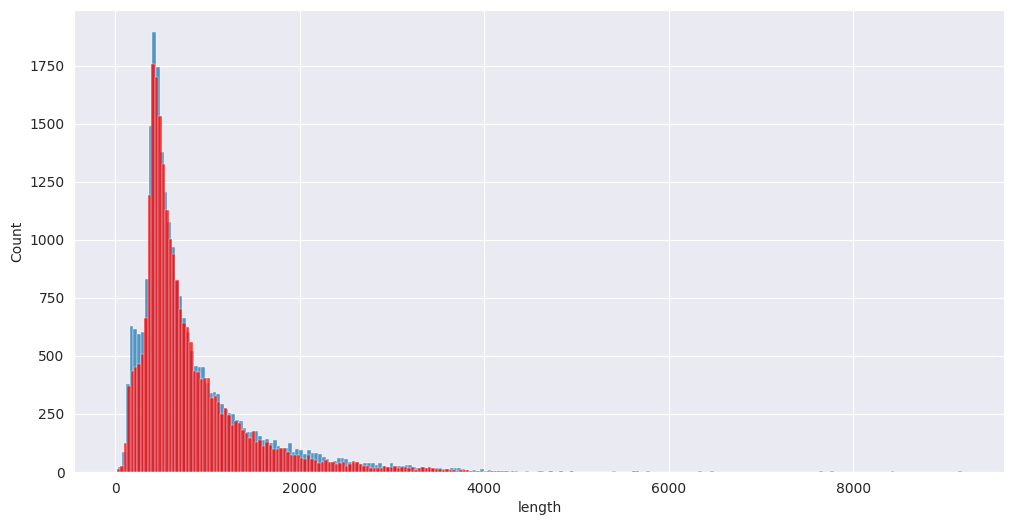

In [ ]:
sns.histplot(data[data['label'] == 1]['length'])
sns.histplot(data[data['label'] == 0]['length'],color='red')
plt.show()

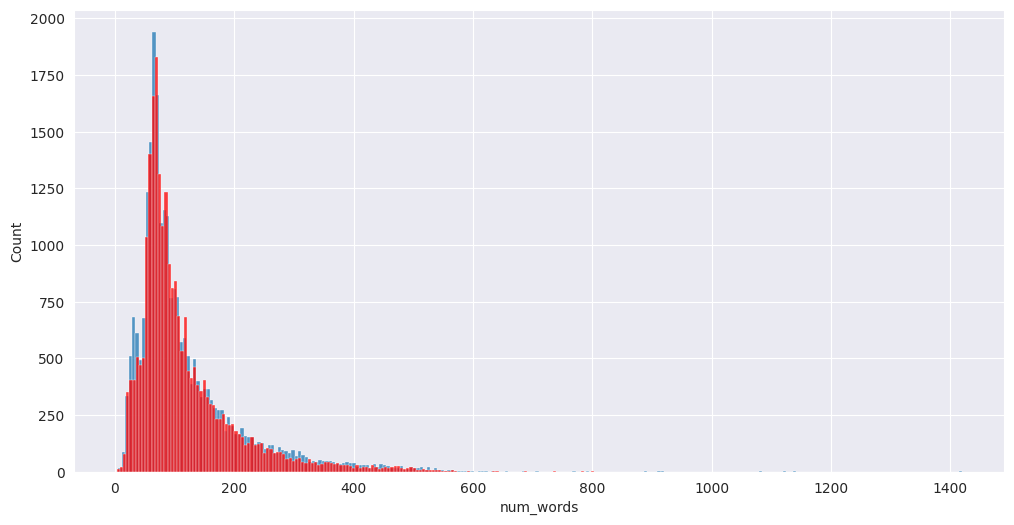

In [ ]:
sns.histplot(data[data['label'] == 1]['num_words'])
sns.histplot(data[data['label'] == 0]['num_words'],color='red')
plt.show()

# Word Clouds

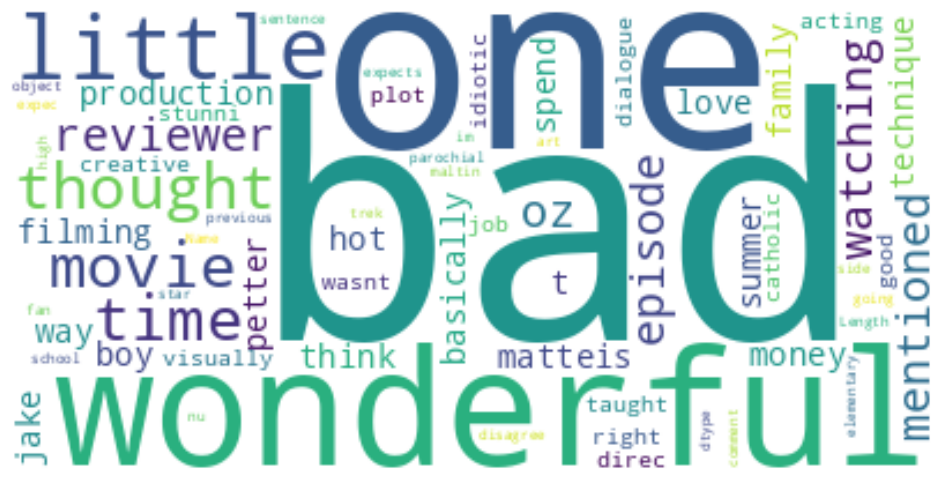

In [ ]:
wc = WordCloud(stopwords=STOPWORDS,
    background_color='white', mode='RGB').generate(str(data["sentence"]))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
def wordcl(data, title):
    stop = STOPWORDS
    wc = WordCloud(background_color='white', stopwords=stop).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

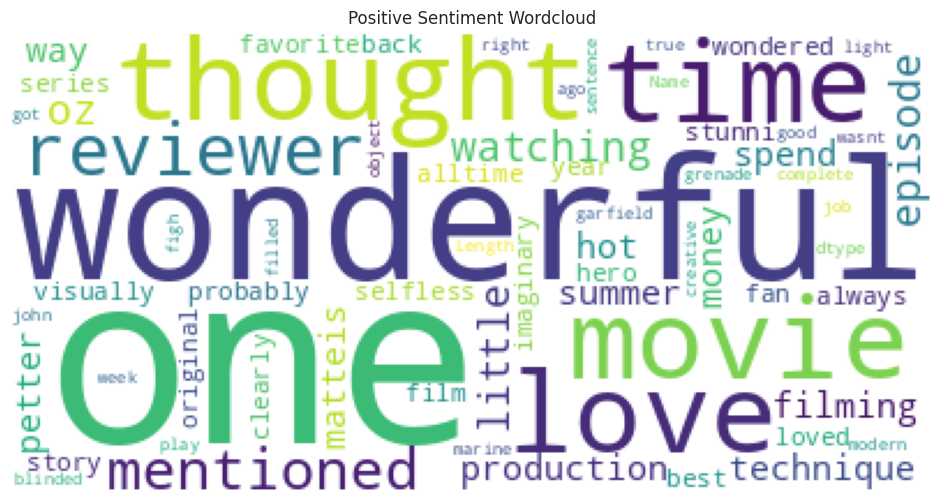

In [ ]:
wordcl(str(positive['sentence']), 'Positive Sentiment Wordcloud')

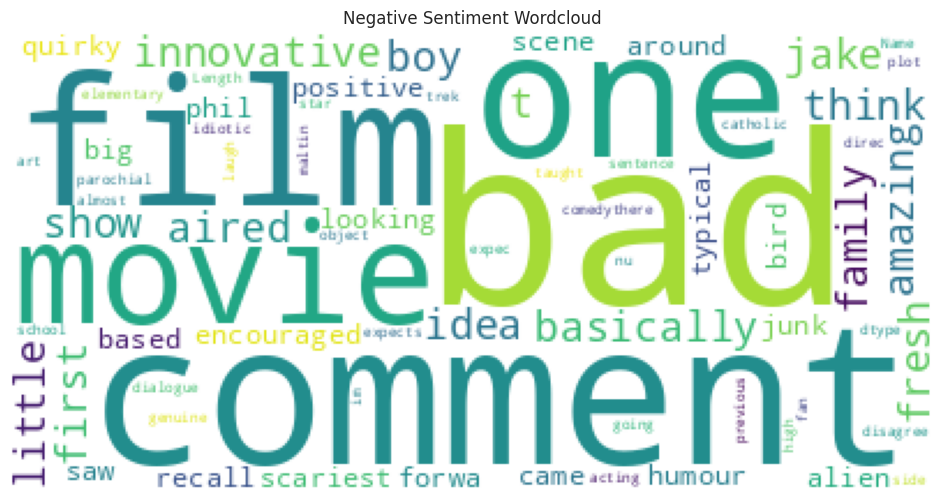

In [ ]:
wordcl(str(negative['sentence']), 'Negative Sentiment Wordcloud')

# Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV, KFold
from gensim.models import Word2Vec
from sklearn.svm import SVC

# since the dataset too large we take samples from the datasets

In [ ]:
min_sample = 12500

positive_sample = positive.sample(min_sample, random_state=42)
negative_sample = negative.sample(min_sample, random_state=42)

df = pd.concat([positive_sample, negative_sample])

In [ ]:
df.shape

(25000, 5)

In [ ]:
df.head()

,review,sentiment,sentence,length,num_words
49005,Not since The Simpsons made it's debut has the...,positive,since simpson made debut sitcom didnt want tur...,1585,224
36482,It's a strange thing to see a film where some ...,positive,strange thing see film scene work rather weakl...,1829,260
24677,"Real cool, smart movie. I loved Sheedy's color...",positive,real cool smart movie loved sheedys color espe...,191,28
23273,Why all the negative reviews??? You didn't exp...,positive,negative review didnt expect movie like master...,617,89
49732,This is a good film for die-hard Chucky fans. ...,positive,good film diehard chucky fan okay im sure good...,460,71


converting output column into numeric

In [ ]:
df['label']= df['sentiment'].map({'negative':0,'positive':1})
df.head()

,review,sentiment,sentence,length,num_words,label
49005,Not since The Simpsons made it's debut has the...,positive,since simpson made debut sitcom didnt want tur...,1585,224,1
36482,It's a strange thing to see a film where some ...,positive,strange thing see film scene work rather weakl...,1829,260,1
24677,"Real cool, smart movie. I loved Sheedy's color...",positive,real cool smart movie loved sheedys color espe...,191,28,1
23273,Why all the negative reviews??? You didn't exp...,positive,negative review didnt expect movie like master...,617,89,1
49732,This is a good film for die-hard Chucky fans. ...,positive,good film diehard chucky fan okay im sure good...,460,71,1


spliting data into train and test

In [ ]:
df['label'].value_counts()

,count
label,
1,12500
0,12500


In [ ]:
x = df['sentence']
y = df['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

# BERT model's

In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
# model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Function to generate BERT embeddings
def get_bert_embeddings(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token embedding

# Generate BERT embeddings for train and test
train_embeddings = [get_bert_embeddings([text]) for text in x_train]
test_embeddings = [get_bert_embeddings([text]) for text in x_test]

# Convert lists to NumPy arrays
train_embeddings = np.array(train_embeddings).squeeze()
test_embeddings = np.array(test_embeddings).squeeze()


KeyboardInterrupt: 

# TF-IDF

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform training data, transform testing data
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)


In [ ]:
# Train model
clf_tfidf = LogisticRegression(max_iter=200)
clf_tfidf.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

# Evaluate
print("TF-IDF Logistic Regression Performance:")
print(classification_report(y_test, y_pred_tfidf))

TF-IDF Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2483
           1       0.88      0.91      0.89      2517

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



# For unigram

In [ ]:
def predict(model):
    model = model.fit(x_train, y_train)
    ypred = model.predict(x_test)

    trainac = model.score(x_train, y_train)
    testac = model.score(x_test, y_test)

    print(f"Train accuracy {trainac}\nTest accuracy {testac}")

    print(classification_report(y_test, ypred))

In [ ]:
tf =  TfidfVectorizer(ngram_range=(1,1))
x = tf.fit_transform(df['sentence'])

y = df['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
predict(AdaBoostClassifier())

Train accuracy 0.7482
Test accuracy 0.738
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      2483
           1       0.70      0.83      0.76      2517

    accuracy                           0.74      5000
   macro avg       0.75      0.74      0.74      5000
weighted avg       0.75      0.74      0.74      5000



In [ ]:
predict(GradientBoostingClassifier())

Train accuracy 0.8264
Test accuracy 0.8002
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2483
           1       0.77      0.86      0.81      2517

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



In [ ]:
predict(RandomForestClassifier())

Train accuracy 1.0
Test accuracy 0.8486
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2483
           1       0.85      0.85      0.85      2517

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [ ]:
predict(LogisticRegression())

Train accuracy 0.93565
Test accuracy 0.89
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2483
           1       0.88      0.91      0.89      2517

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [ ]:
predict(MultinomialNB())

Train accuracy 0.9256
Test accuracy 0.8648
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2483
           1       0.89      0.84      0.86      2517

    accuracy                           0.86      5000
   macro avg       0.87      0.86      0.86      5000
weighted avg       0.87      0.86      0.86      5000



# Bi-gram

In [ ]:
tf =  TfidfVectorizer(ngram_range=(2,2))
x = tf.fit_transform(df['sentence'])

y = df['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
predict(LogisticRegression())

Train accuracy 0.99645
Test accuracy 0.8334
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2483
           1       0.80      0.88      0.84      2517

    accuracy                           0.83      5000
   macro avg       0.84      0.83      0.83      5000
weighted avg       0.84      0.83      0.83      5000



In [ ]:
predict(MultinomialNB())

Train accuracy 0.9996
Test accuracy 0.8588
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2483
           1       0.89      0.82      0.85      2517

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [ ]:
predict(RandomForestClassifier())

# Logistic regression working well in unigram so we go for a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2483
           1       0.88      0.91      0.89      2517

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Accuracy: 0.8898


In [ ]:
a=data['review'][6]

In [ ]:
a

"I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a comeback of a new sea hunt.We need a change of pace in TV and this would work for a world of under water adventure.Oh by the way thank you for an outlet like this to view many viewpoints about TV and the many movies.So any ole way I believe I've got what I wanna say.Would be nice to read some more plus points about sea hunt.If my rhymes would be 10 lines would you let me submit,or leave me out to be in doubt and have me to quit,If this is so then I must go so lets do it."

In [ ]:
a= clean_text(a)

In [ ]:
a

'sure would like see resurrection dated seahunt series tech today would bring back kid excitement mei grew black white tv seahunt gunsmoke hero every weekyou vote comeback new sea huntwe need change pace tv would work world water adventureoh way thank outlet like view many viewpoint tv many moviesso ole way believe ive got wan na saywould nice read plus point sea huntif rhyme would line would let submitor leave doubt quitif must go let'

In [ ]:
a_trans = tfidf.transform([a])

In [ ]:
model.predict(a_trans)

array([1])

In [ ]:
data['label'][6]

1

In [ ]:
b = '''Galactic Battle: The Rise of Shadows" had all the potential to be a thrilling sci-fi adventure, but it ultimately turned out to be a two-hour test of patience.

First, let’s talk about the plot—or lack thereof. The story was a convoluted mess of clichés that felt like it was cobbled together from the cutting room floor of better movies. Every twist was predictable, every emotional moment forced, and every dialogue packed with c'''

In [ ]:
b = clean_text(b)

In [ ]:
b_trans = tfidf.transform([b])

In [ ]:
model.predict(b_trans)

array([0])

# Pipeline

In [ ]:
x1 = df['sentence']
Y1 = df['label']

In [ ]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(x1,Y1,test_size=0.20,random_state=42)

In [ ]:
def clean_text(text):

    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = text.lower()
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])
    tokens = nltk.word_tokenize(text)
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(i) for i in tokens if i not in stopwords.words('english')]
    text = ' '.join(tokens)

    return text

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=200))
])
model.fit(Xtrain,Ytrain)
ypred =model.predict(Xtest)

In [ ]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [ ]:

import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
import re
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load the saved model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

def predict_sentiment(text):
    def clean_text(text):
        text = BeautifulSoup(text, "html.parser").get_text()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'http\S+', '', text)
        text = text.lower()
        text = ''.join([i for i in text if i.isalpha() or i.isspace()])
        tokens = nltk.word_tokenize(text)
        lemma = WordNetLemmatizer()
        tokens = [lemma.lemmatize(i) for i in tokens if i not in stopwords.words('english')]
        text = ' '.join(tokens)
        return text
    cleaned_text = clean_text(text)
    prediction = model.predict([cleaned_text])
    if prediction[0] == 1:
        return "Positive"
    else:
        return "Negative"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
predict_sentiment('''Galactic Battle: The Rise of Shadows" had all the potential to be a thrilling sci-fi adventure, but it ultimately turned out to be a two-hour test of patience.

First, let’s talk about the plot—or lack thereof. The story was a convoluted mess of clichés that felt like it was cobbled together from the cutting room floor of better movies. Every twist was predictable, every emotional moment forced, and every dialogue packed with c
''')

'Negative'